In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import Model
import tensorflow.keras as k


import numpy as np
import cv2 
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

#%load_ext tensorboard.notebook

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!rm rf ./logs/

import datetime

rm: cannot remove 'rf': No such file or directory
rm: cannot remove './logs/': No such file or directory


In [0]:
num_classes = 10

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()#label_mode='fine')

x_train = x_train.astype('float32') / 255.
x_test =  x_test.astype('float32')  / 255.

#x_train = np.reshape(np.array([cv2.cvtColor(x_train[i], cv2.COLOR_BGR2GRAY) for i in range(x_train.shape[0])]), (50000,32,32,1))
#x_test  = np.reshape(np.array([cv2.cvtColor(x_test[i], cv2.COLOR_BGR2GRAY) for i in range(x_test.shape[0])]), (x_test.shape[0],32,32,1))

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

print(x_train.shape)

#plt.imshow(x_train[3], cmap = plt.cm.binary)
#print(len(y_train))

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


View the data

In [0]:
def CNNmodel():
  a = Input(shape = x_train.shape[1:])
  x = Conv2D(8,(3,3), activation = "relu", padding = "same")(a)
  x1 = Conv2D(16,(3 ,3), activation = "relu", padding = "same")(x) 
  x = Conv2D(32,(3 ,3), activation = "relu", padding = "same")(x1)
  x = concatenate([x,x1]) 
  #x = Conv2D(32,(3 ,3), activation = "relu", padding = "same")(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
  x = Dropout(0.1)(x)
  
  
  x = Conv2D(32,(3 ,3), activation = "relu", padding = "same")(x)
  x = Conv2D(64,(3 ,3), activation = "relu", padding = "same")(x)
  x = BatchNormalization()(x)  
  x = MaxPooling2D(pool_size=(2,2))(x)
  x = Dropout(0.2)(x)

  x = Conv2D(128,(3 ,3), activation = "relu", padding = "same")(x)  
  x = Conv2D(128,(3 ,3), activation = "relu", padding = "same")(x)
  x = BatchNormalization()(x)  
  x = MaxPooling2D(pool_size=(2,2), padding = "same")(x)
  x = Dropout(0.3)(x)
  
  x2 = Conv2D(64,(2 ,2), activation = "relu", padding = "same")(x)
  x = Conv2D(64,(3 ,3), activation = "relu", padding = "same")(x2)
  x = concatenate([x,x2])
  #x = Conv2D(64,(3 ,3), activation = "relu", padding = "same")(x) #Extra
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  
  x = Flatten()(x)
  x = Dense(128)(x)
  x = Activation('relu')(x)
  #x = Dense(128)(x)
  #x = Dense(128)(x)
  #x = Activation('relu')(x)
  #x = Dense(64)(x)
  #x = Activation('relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(num_classes)(x)
  output = Activation('softmax')(x)
  
  arch = Model(inputs=a, outputs=output)
  # initiate optimizer
  opt = k.optimizers.Adam(lr=0.001)
  #opt = k.optimizers.Nadam(lr=0.001)
  #opt = k.optimizers.RMSprop(lr=0.0001, decay=1e-6)
  
  arch.summary()
  # Let's train the model using RMSprop
  arch.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  return arch

conv_net = CNNmodel()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 32, 32, 8)    224         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 32, 32, 16)   1168        conv2d_9[0][0]                   
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 32, 32, 32)   4640        conv2d_10[0][0]                  
____________________________________________________________________________________________

In [0]:
#history = model.fit(x_train, y_train, batch_size= 5, epochs=100, validation_data = (x_test, y_test), shuffle=True)
#history = conv_net.fit(x_train, y_train, batch_size= 50, epochs = 100, validation_data = (x_test, y_test))  
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train, y_train, batch_size=50),\
                    steps_per_epoch=x_train.shape[0] // 50,
                    epochs=125,
                    verbose=1,
                    validation_data=(x_test,y_test))                 
"""callbacks = [tf.keras.callbacks.TensorBoard("logs/sample/keras")]

filename = "/content/gdrive/My Drive/conv_net.h5"
callbacks = [k.callbacks.ModelCheckpoint(filename, monitor='val_acc', save_best_only=True)]
history = conv_net.fit(x_train, y_train,
          batch_size = 50,
          epochs=100,
          validation_data=(x_test, y_test),  
          shuffle=True,
          callbacks=callbacks)
"""

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 30s 599us/sample - loss: 1.3993 - acc: 0.4938 - val_loss: 1.2401 - val_acc: 0.5743
Epoch 2/100
50000/50000 [==============================] - 29s 586us/sample - loss: 1.1261 - acc: 0.6077 - val_loss: 1.1551 - val_acc: 0.5771
Epoch 3/100
50000/50000 [==============================] - 29s 585us/sample - loss: 0.9665 - acc: 0.6671 - val_loss: 1.0960 - val_acc: 0.6293
Epoch 4/100
50000/50000 [==============================] - 29s 579us/sample - loss: 0.8645 - acc: 0.7077 - val_loss: 0.9001 - val_acc: 0.6877
Epoch 5/100
50000/50000 [==============================] - 29s 588us/sample - loss: 0.7785 - acc: 0.7377 - val_loss: 0.7475 - val_acc: 0.7408
Epoch 6/100
50000/50000 [==============================] - 29s 575us/sample - loss: 0.7178 - acc: 0.7588 - val_loss: 0.8047 - val_acc: 0.7394
Epoch 7/100
50000/50000 [==============================] - 28s 563us/sample - loss: 0.6584 - acc: 

This Network has a highest of 86% Validation Accuracy


In [0]:
val = conv_net.evaluate(x_test, y_test)
print(val)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

In [0]:
from tensorflow.keras.models import load_model
#best_conv = load_model('/content/gdrive/My Drive/ResNetmodel.h5')
best_conv = load_model('/content/gdrive/My Drive/conv_net.h5')

val1 = best_conv.evaluate(x_test, y_test)
print(val1)

10000/10000 [==============================] - 3s 318us/sample - loss: 0.7292 - acc: 0.8580
[0.7292039191186428, 0.858]


In [0]:
class_name = {
    0: 'plane',
    1: 'auto',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

#num_fig = 16 #Use a square number
#start = 0
predictions = best_conv.predict(x_test)

"""
fig = plt.figure(figsize=(15,15))
for i in range(num_fig):
    title = class_name[np.argmax(predictions[i+start])]+ " : " + str(np.argmax(predictions[i+start]) == np.argmax(y_test[i+start]))
    plt.subplot(int(num_fig**0.5), int(num_fig**0.5), i+1)
    #plt.subplot(int(num_fig**0.5), int(num_fig**0.5), i+1).set_title(title)
    plt.imshow(x_test[i+start, :, :, :])
    plt.axis('off')"""

'\nfig = plt.figure(figsize=(15,15))\nfor i in range(num_fig):\n    title = class_name[np.argmax(predictions[i+start])]+ " : " + str(np.argmax(predictions[i+start]) == np.argmax(y_test[i+start]))\n    plt.subplot(int(num_fig**0.5), int(num_fig**0.5), i+1)\n    #plt.subplot(int(num_fig**0.5), int(num_fig**0.5), i+1).set_title(title)\n    plt.imshow(x_test[i+start, :, :, :])\n    plt.axis(\'off\')'

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('blue')

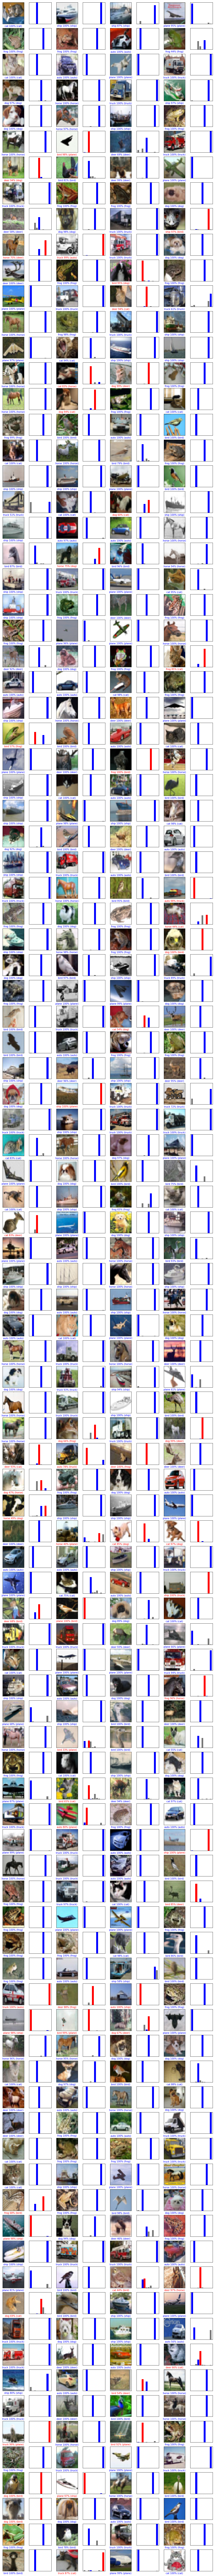

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 100
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

In [0]:
%tensorboard --logdir logs/sample

In [0]:
!kill 4577

/bin/bash: line 0: kill: (4577) - No such process


In [0]:
predictions = model.predict(x_test)
error = [np.argmax(predictions[i]) == np.argmax(y_test[i]) for i in range(y_test.shape[0])]
error.count(True)/len(error)
#print(predictions[0], y_test[0])

0.6734